# 🧠 Waste Classification Model Training
This notebook loads, processes, and trains a CNN model on waste images.

In [40]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

img_height, img_width = 150, 150
batch_size = 32

In [46]:
# Prepare dataset
train_dir = '../dataset'
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        subset='training')

val_gen = datagen.flow_from_directory(train_dir,
                                      target_size=(img_height, img_width),
                                      batch_size=batch_size,
                                      class_mode='categorical',
                                      subset='validation')

Found 15814 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.


In [48]:
# Build model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Callbacks
os.makedirs('model', exist_ok=True)
checkpoint = ModelCheckpoint('model/waste_classifier.h5', save_best_only=True)
earlystop = EarlyStopping(patience=5, restore_best_weights=True)

In [58]:
# Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=15,
                    callbacks=[checkpoint, earlystop])

Epoch 1/15
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.8886 - loss: 0.3354

495/495 ━━━━━━━━━━━━━━━━━━━━ 140s 282ms/step - accuracy: 0.8886 - loss: 0.3354 - val_accuracy: 0.6883 - val_loss: 1.1970
Epoch 2/15
495/495 ━━━━━━━━━━━━━━━━━━━━ 125s 253ms/step - accuracy: 0.9338 - loss: 0.2061 - val_accuracy: 0.6845 - val_loss: 1.3629
Epoch 3/15
495/495 ━━━━━━━━━━━━━━━━━━━━ 134s 270ms/step - accuracy: 0.9461 - loss: 0.1692 - val_accuracy: 0.6936 - val_loss: 1.5238
Epoch 4/15
495/495 ━━━━━━━━━━━━━━━━━━━━ 133s 267ms/step - accuracy: 0.9675 - loss: 0.1093 - val_accuracy: 0.6933 - val_loss: 1.5616
Epoch 5/15
495/495 ━━━━━━━━━━━━━━━━━━━━ 126s 255ms/step - accuracy: 0.9692 - loss: 0.1009 - val_accuracy: 0.6857 - val_loss: 1.6933
Epoch 6/15
495/495 ━━━━━━━━━━━━━━━━━━━━ 125s 253ms/step - accuracy: 0.9714 - loss: 0.0950 - val_accuracy: 0.7078 - val_loss: 1.7163


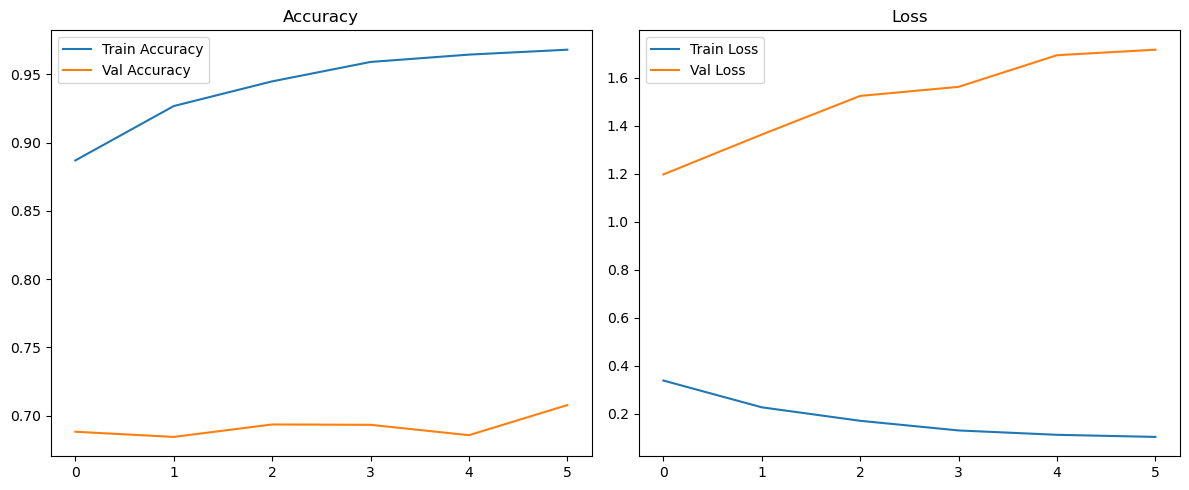

In [60]:
# Plot training accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [70]:
import os

print("Current dir:", os.getcwd())
print("Contents of parent folder:", os.listdir('..'))

# Check if model folder exists in parent folder
model_path = '../model'
if not os.path.exists(model_path):
    print(f"Folder '{model_path}' does NOT exist, creating it now...")
    os.makedirs(model_path)
else:
    print(f"Folder '{model_path}' exists.")

Current dir: C:\Users\DELL\Downloads\AI_Waste_Segregation_Complete\notebooks
Contents of parent folder: ['app', 'dataset', 'model', 'notebooks', 'README.md']
Folder '../model' exists.


In [72]:
import os

model_file = '../model/waste_classifier.h5'

if os.path.exists(model_file):
    print(f"File {model_file} already exists.")
    print("File size:", os.path.getsize(model_file), "bytes")
    try:
        with open(model_file, 'rb+') as f:
            print("File is writable.")
    except Exception as e:
        print("File is NOT writable:", e)
else:
    print(f"File {model_file} does NOT exist yet.")

File ../model/waste_classifier.h5 already exists.
File size: 0 bytes
File is NOT writable: [Errno 13] Permission denied: '../model/waste_classifier.h5'


In [74]:
model.save('../model/waste_classifier_new.h5')

In [76]:
# Save in current folder first
model.save('waste_classifier.h5')

# Then move the file
import shutil

shutil.move('waste_classifier.h5', '../model/waste_classifier.h5')
print("Model saved and moved successfully!")

Model saved and moved successfully!


In [78]:
from tensorflow.keras.models import load_model

model = load_model('../model/waste_classifier.h5')
print("✅ Model loaded successfully")

✅ Model loaded successfully
